In [ ]:
import pyautogui # 截屏软件
import pytesseract # OCR
import requests
import json
import pyperclip # 用于将内容复制到剪贴板

使用本项目，需要
1. Python环境，并pip install pyautogui, pytesseract, pyperclip
2. 安装OCR软件 https://github.com/tesseract-ocr/tesseract/releases/
3. 拥有OPENAI API密钥
4. 将OPENAI_API_KEY和OCR_PATH更改为你的取值

In [ ]:
# 替换为你的OPENAI API密钥
OPENAI_API_KEY  = ""  

# 配置 Tesseract OCR 路径（根据你的安装路径调整）
# Tesseract需要另外安装 https://github.com/tesseract-ocr/tesseract/releases/
OCR_PATH = r'D:\CodeENV\tesseract\tesseract.exe'

In [ ]:
# 此提示词用于ChatGPT API
PROMPT = '''
You are a master with extensive experience in the financial field. You are well-versed in various aspects of the stock market, cryptocurrencies, and global finance.

I will provide a question along with some possible answer choices. The text is extracted from an image using OCR, so please ignore any garbled characters or make reasonable inferences about the content.

Answer my question directly without providing explanations. If none of the given answer choices are correct, provide the correct answer without explanation.

Please note: **If you do not know the answer, simply say "I don't know" without guessing. Followed by some key words that I could use to google the answer** This is really important!
You will lose 1 million dollor if you don't know the answer but you made a random guess. You won't lose money if you don't know and you answer I don't know.

LETS START:
'''

# 此提示词用于ChatGPT网页版
PROMPT_WEB = '''
You are a master with extensive experience in the financial field. You are well-versed in various aspects of the stock market, cryptocurrencies, and global finance.

I will provide a question along with some possible answer choices. The text is extracted from an image using OCR, so please ignore any garbled characters or make reasonable inferences about the content.

Answer my question directly without providing explanations. If none of the given answer choices are correct, provide the correct answer without explanation.

LETS START:
'''

# OCR 软件
pytesseract.pytesseract.tesseract_cmd = OCR_PATH


In [3]:
# 截取屏幕指定区域的函数
def capture_screen_region(x1, y1, width, height):
    """截取屏幕指定区域"""
    screenshot = pyautogui.screenshot(region=(x1, y1, width, height))
    return screenshot

# OCR识别图片中的文字
def perform_ocr(image):
    """使用Tesseract OCR识别图片中的文字"""
    # 对于中文识别，添加语言包参数
    text = pytesseract.image_to_string(image, lang='chi_sim+eng')
    return text.strip()

# 发送请求到ChatGPT API
def send_to_chatgpt(text):
    """将文本发送到ChatGPT API并获取回复"""
    url = "https://api.openai.com/v1/chat/completions"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {OPENAI_API_KEY}"
    }
    
    data = {
        "model": "gpt-4o",  # 或其他您想使用的模型
        # "store": "true",
        "messages": [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": text}
        ],
        "max_tokens": 100
    }
    
    response = requests.post(url, headers=headers, data=json.dumps(data))
    
    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return f"Error: {response.status_code}, {response.text}"


截图示例

In [4]:
screen_region = (0, 500, 500, 600)
screenshot = capture_screen_region(*screen_region)

text = perform_ocr(screenshot)

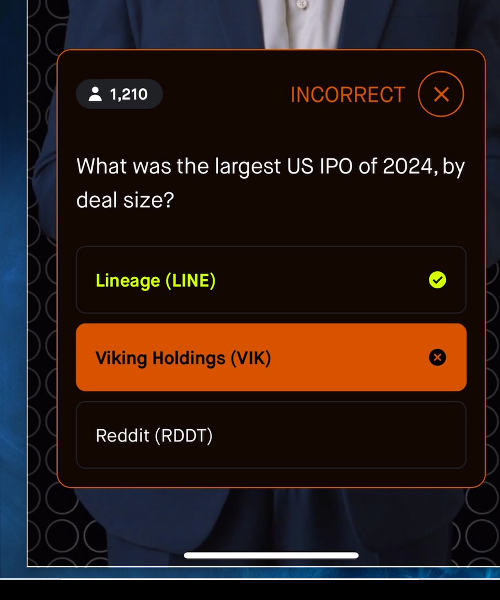

In [5]:
screenshot

一键执行

In [ ]:
pyperclip.copy("")
screen_region = (0, 500, 500, 600)
screenshot = capture_screen_region(*screen_region)

text = perform_ocr(screenshot)
pyperclip.copy(PROMPT_WEB + text) # 将题目内容复制到剪贴板中，以便于手动粘贴到网页版ChatGPT中
for i in range(5):
    print(send_to_chatgpt(PROMPT + text))

I don't know. (largest US IPO 2024)
I don't know. Keywords: "largest US IPO 2024 deal size"
I don't know. (largest US IPO of 2024)
I don't know. Keywords to google: "largest US IPO 2024 by deal size"
I don't know. **largest US IPO of 2024**
